In [2]:
%matplotlib inline

## [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
- A model that predicts target variables by learning simple, inferred decision rules.
- Easy to understand & visualize; requires little data prep; prediction cost is logarithmic function of #datapoints; handles both numeric & categorical data; handles multiple-output problems; possible to validate with statisitcal tests.
- Can result in overly-complex trees (ie, overfitting); can be unstable - data variations can cause completely different trees to be generated (ensembles are a good workaround for this); trees can be biased if some classes dominate (mitigation: balance dataset prior to fitting).

- complexity: build time = $O(n_{samples}n_{features}\log(n_{samples}))$
- complexity: query time = $O(\log(n_{samples}))$

## [DT Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- accepts array X (nsamples, nfeatures; spare or dense) of training samples and array Y (nsamples, integers) of class labels.

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

# predict class of samples
print(clf.predict([[2.0,2.0]]))

# probability of each class = #training samples of same class in given "leaf"
print(clf.predict_proba([[2.0,2.0]]))

[1]
[[0. 1.]]


- Capable of binary (labels: [-1,+1]) and multiclass (labels: [0...k-1]) classification.
- Below: Iris dataset tree construction.

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
X,y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

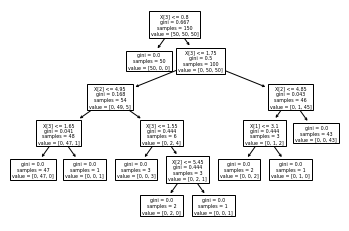

In [4]:
tree.plot_tree(clf)

## DT Visualization with [GraphViz](https://www.graphviz.org/)
- below: save viz results in "iris.pdf"
- [exporter function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz) supports inline rendering for Jupyter, color-coding nodes & using explicit variable/class names.

In [6]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph    = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

In [7]:
dot_data = tree.export_graphviz(clf,
                               out_file = None,
                               feature_names = iris.feature_names,
                               class_names   = iris.target_names,
                               filled        = True,
                               rounded       = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
graph

NameError: name 'iris' is not defined

- Text export supported with [export_text](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html#sklearn.tree.export_text)

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



## Example: plot Iris dataset decision surface

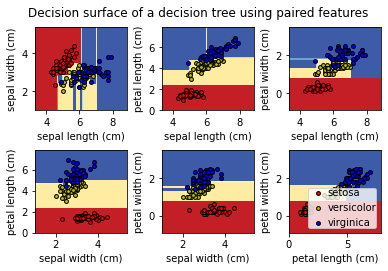

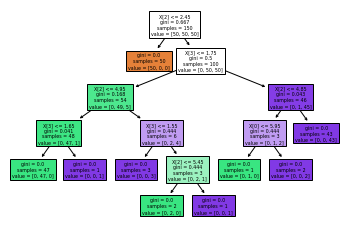

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

n_classes   = 3
plot_colors = "ryb"
plot_step   = 0.02
iris        = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    clf = DecisionTreeClassifier().fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

## DT Regression
- Only difference w.r.t. classification: y variables expected to be floating point

In [11]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

## Example: Regression of Sine curve with noise
- Observation: if ```max_depth``` is set too high, the DT learns too much detail (overfit).

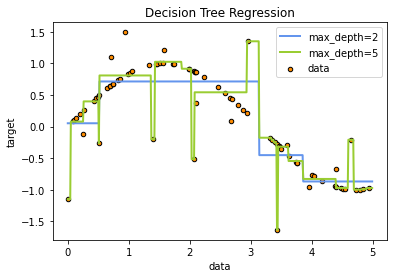

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## DTs: multiple outputs
- when Y is a 2D array of (nsamples, noutputs)
- if no correlation between outputs, simple sol'n = build n indepedent models
- if some correlation is expected (far more likely), some algorithm tweaks are needed:
    - store n output values in leaves
    - use a _splitting criteria_ to find avg reduction across all n outputs.

## Example: DT regression, multiple outputs
- Given circle with single underlying feature.
- As before: if ```max_depth``` is too high, overfitting occurs.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

rng        = np.random.RandomState(1)
X          = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y          = np.array([np.pi * np.sin(X).ravel(), 
                       np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

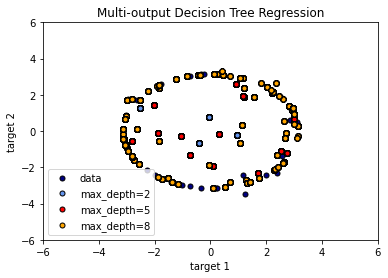

In [14]:
plt.figure()
s = 25
plt.scatter(  y[:, 0],   y[:, 1], c="navy",           s=s, edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s, edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red",            s=s, edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange",         s=s, edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

## Example: [DT classification, multiple outputs](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multioutput_face_completion.html#sphx-glr-auto-examples-miscellaneous-plot-multioutput-face-completion-py)
- demo: face upper half / lower half completion

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [16]:
data, targets = fetch_olivetti_faces(return_X_y=True)
train         = data[targets < 30]
test          = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces       = 5
rng           = check_random_state(4)
face_ids      = rng.randint(test.shape[0], size=(n_faces, ))
test          = test[face_ids, :]
n_pixels      = data.shape[1]

X_train = train[:, :(n_pixels + 1) // 2 ] #upper half
y_train = train[:,   n_pixels      // 2:] #lower half

X_test = test[:, :(n_pixels + 1) // 2 ]
y_test = test[:,   n_pixels      // 2:]

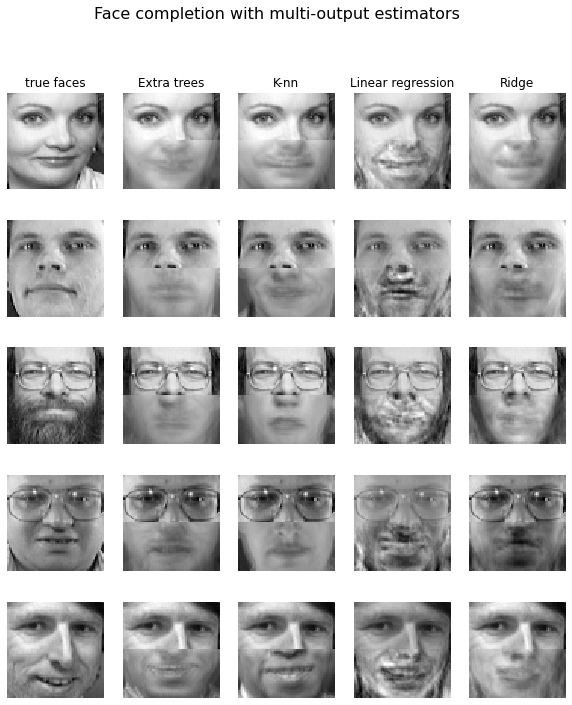

In [17]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, 
                                       max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

## Best Practices
- Pay attention to the #samples/#feature ratio to avoid overfitting on large numbers of features.
- Consider using dimensionality reduction prior to building trees to identify most useful features.
- Visualize using export function with ```max_depth=3``` to start.
- Balance datasets before tree building to prevent biasing. Best practice is to normalize the sum of sample weights for each class.
- All trees interally use 32b Numpy float arrays. Training data will be copied & transformed if not already in this format.
- Consider converting X to a sparse ```csr_matrix``` format before fitting or predicting to improve timing.

## Tree Algorithms: ID3, C4.5, C5.0, CART
- ID3 = Build multipath tree & find categorical feature that yields largest information gain for each node.
- C4.5 = successor to ID3. Converts trained trees (ID3 output) into sets of if/then rules
- C5.0 = latest version by Quinlan. Proprietary license. 
- [CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29) is similar to C4.5 and supports numerical targets for regression. It builds binary trees using the feature & threshold that yield the largest _information gain_ at each node. Scikit uses an optimized version of CART.

## Minimal Cost-Complexity Pruning
- Helps avoid overfitting by pruning trees; controlled by complexity parameter $\alpha\ge0$.
- Recursively finds node with the "weakest link".
- As alpha increases, more nodes are pruned which increases _total impurity_ of its leaves.

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [19]:
X, y                             = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf                              = DecisionTreeClassifier(random_state=0)
path                             = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities           = path.ccp_alphas, path.impurities

- Below: the max effective alpha value is removed (trivial tree - only one node)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

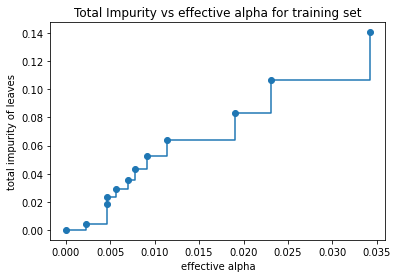

In [20]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

- Next: train DT using effective alphas. Last value in ```ccp_alphas``` is the alpha value that prunes the entire tree - leaving the tree ```clfs[-1]``` with one node.

In [21]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


- Remove last element in ```clfs``` and ```ccp_alphas```. Show that the number of nodes & tree depth decreases as alpha goes up.

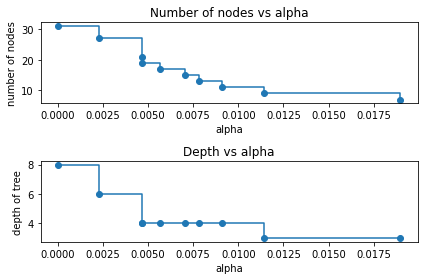

In [24]:
clfs        = clfs[:-1]
ccp_alphas  = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth       = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2,1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

fig.tight_layout()

- When ```ccp_alpha``` is set to zero and other params are tied to their defaults, the tree overfits.
- As alpha increases, the pruned tree does a better job of generalization.

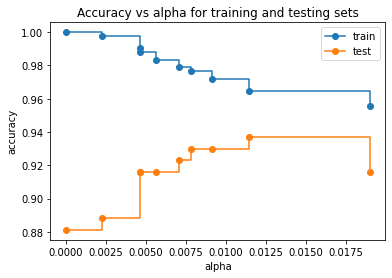

In [25]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas,  test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()